# <center>Data Mining Project</center>

<center>
Master in Data Science and Advanced Analytics <br>
NOVA Information Management School
</center>

** **
## <center>*ABCDEats Inc*</center>

<center>
Group 19 <br>
Jan-Louis Schneider, 20240506  <br>
Marta Boavida, 20240519  <br>
Matilde Miguel, 20240549  <br>
Sofia Gomes, 20240848  <br>
</center>

** **


## <span style="color:salmon"> Notebook </span> 

In this notebook, we do an initial exploration of the dataset. Our conclusions of this notebook will be used to start the preprocessing in the next notebook.

## <span style="color:salmon"> Table of Contents </span>

<a class="anchor" id="top"></a>

1. [Import Libraries](#one-bullet) <br>

2. [Import Datasets](#two-bullet) <br>

3. [Explore Data](#three-bullet) <br>

4. [Data Types](#four-bullet) <br>

5. [Duplicates](#five-bullet) <br>

6. [Missing Values](#six-bullet) <br>

7. [Exploring Features](#seven-bullet) <br>
    7.1 [Numerical Variables](#seven-one-bullet) <br>
    7.2 [Categorical Variables](#seven-two-bullet) <br>
    
8. [Export Datasets](#eight-bullet) <br> 



<a class="anchor" id="one-bullet"></a>
## <span style="color:salmon"> 1. Import Libraries </span> 

In [1]:
import pandas as pd 
import numpy as np
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import scipy.stats as stats
import warnings

# Missing Values
import missingno as msno

from math import ceil
from sklearn.impute import KNNImputer

from utils import *
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

<a class="anchor" id="two-bullet"> 

## <span style="color:salmon"> 2. Import Dataset </span> 

<a href="#top">Top &#129033;</a>

In [2]:
df = pd.read_csv("../dataset/DM2425_ABCDEats_DATASET.csv")

<a class="anchor" id="three-bullet"> 

## <span style="color:salmon"> 3. Explore Data </span> 
<span style="color:salmon"> Conduct an in-depth exploration of the dataset. Summarise key statistics for the data, and discuss their possible implications. </span> 

<a href="#top">Top &#129033;</a>

In order to a better understanding the dataset, we started exploring it

1. Get the shape of the dataset and the name of the columns

In [3]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 31888 rows and 56 columns.


In [4]:
df.columns.values

array(['customer_id', 'customer_region', 'customer_age', 'vendor_count',
       'product_count', 'is_chain', 'first_order', 'last_order',
       'last_promo', 'payment_method', 'CUI_American', 'CUI_Asian',
       'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese',
       'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian',
       'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER',
       'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2',
       'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3',
       'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11',
       'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18',
       'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23'], dtype=object)

2. See the first ten lines

In [5]:
df.head(10)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.00,0.0,0.0,0.0,0.0,0.00,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,40.87,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6aef2b6726,8670,40.0,2,2,0,0.0,2,FREEBIE,DIGI,0.00,24.92,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,8475ee66ef,2440,24.0,2,2,2,0.0,2,-,CARD,5.88,0.00,1.53,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
7,f2f53bcc67,8670,27.0,2,3,2,0.0,2,DISCOUNT,DIGI,11.71,0.00,24.40,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8,5b650c89cc,2360,20.0,3,4,2,0.0,3,DISCOUNT,DIGI,2.75,0.00,0.00,0.0,0.0,0.0,0.0,4.39,0.00,0.0,0.0,0.0,7.3,0.0,0.0,0,0,1,0,0,0,2,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
9,84775a7237,8670,20.0,2,3,0,0.0,3,DELIVERY,CARD,0.00,32.48,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


3. Get information about the data types in each column, non-null values and memory usage

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

4. Describe columns:

In [7]:
df.describe()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,31161.000000,31888.000000,31888.000000,31888.000000,31782.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,30723.0,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.0000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000
mean,27.506499,3.102609,5.668245,2.818866,28.478604,63.675521,4.880438,9.960451,2.300633,0.801163,0.768096,1.431218,0.884359,0.950203,1.631153,3.233411,2.995379,0.711676,2.999913,3.913253,0.841697,0.555914,0.567486,0.591006,0.619449,0.677747,0.652973,0.704246,0.0,0.053845,0.063190,0.118759,0.101700,0.081943,0.069681,0.0768,0.131899,0.233912,0.329560,0.378167,0.314162,0.236453,0.215630,0.277032,0.356435,0.390962,0.336961,0.245610,0.142812,0.071155,0.048263,0.045189
std,7.160898,2.771587,6.957287,3.977529,24.109086,23.226123,11.654018,23.564351,8.479734,6.427132,3.657273,8.191755,5.259868,5.830590,7.443234,11.247990,10.180851,4.536457,9.768300,15.548507,4.433047,1.013601,1.044090,1.045907,1.069672,1.088122,1.069947,1.167446,0.0,0.317013,0.351498,0.500862,0.437493,0.358705,0.329461,0.3777,0.635582,0.724906,0.891161,0.959961,0.842484,0.637502,0.599006,0.738162,0.874449,0.943721,0.893949,0.795296,0.586529,0.348536,0.298265,0.282006
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,2.000000,1.000000,7.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,3.000000,2.000000,22.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,4.000000,7.000000,3.000000,45.000000,83.000000,5.660000,11.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,41.000000,269.000000,83.000000,90.000000,90.000000,

Insights from `.describe()` Summary

1. customer_age
   - **Mean**: most requests are made by people aged 27
   - **Min**: the person who made the request who is the youngest is 15 years old
   - **Max**: the person who made the request who is the greathest is 80 years old
   - **IQR**: most of the people who order are between 23 and 31 years old

2. vendedor_count
   - **Mean**: the average number of unique suppliers the customer has ordered from is 3.
   - **Min**: the min of unique suppliers is 0
   - **Max**: the max of unique suppliers is 41
   - **IQR**: Many individuals have a number of unique suppliers between 1 and 4

3. product_count
   - **Count**: The total of products orderers are 31888
   - **Mean**: on average, a person orders 6 products
   - **Min**: there are people who ask for nothing
   - **Max**: there are people who ask for 269 products
   - **IQR**: Most people order between 2 and 7

4. is_chain
   - **Mean**: average of order was from a chain restaurant is 3
   - **Max**: there are people that orders from 83 chain restaurant 
   - **IQR**: Most people order between 1 and 3 from chain restaurant 

5. first_order
   - **Mean**: the average of days from the start when the customer first placed an order is 28
   - **Max**: the max of days from the start when the customer first placed an order is 90
   - **IRQ**: the days from the start when the customer first placed an order is between 7 and 45

6. last_order
   - **Mean**: the average of days from the start when the customer most recently placed an order is 63
   - **Max**: the max of days from the start when the customer most recently placed placed an order is 90
   - **IRQ**: the days from the start when the customer most recently placed an order is between 49 and 83



**General Conclusions**

- Data Structure Overview:
    - There are 52 numerical columns (float64, int64) and 4 categorical columns (object).

- Missing Data:
    - Several columns have values 0, such as `CUI_Cafe`, `CUI_Desserts` and others. Before handling this values, we must take into account that they may exist due to lack of information or they simply do not exist.


<a class="anchor" id="four-bullet"> 

## <span style="color:salmon"> 4. Data types </span> 
<span style="color:salmon"> Explore the data types of each columns </span> 


<a href="#top">Top &#129033;</a>


Above, we noticed that some datatypes are not correct. As such, we started by putting our features in the right format to start our exploration

1. convert float columns to int

In [8]:
# convert "customer_age" from float to int
df["customer_age"]= df["customer_age"].astype("Int64")

In [9]:
# convert "first_order" from float to int
df["first_order"] = df["first_order"].astype("Int64")

In [10]:
# convert "HR_0" from float to int
df["HR_0"] = df["HR_0"].astype("Int64")

2. Another detail about incorrect data is between product_count and vendor_count. There is information about products that were not purchased but there is information about sellers who sold them.

In [11]:
# Product_count = 0, some have vendor_count = 1. 
product_count_zero = vendor_count_zero = df.loc[df["product_count"]==0, ["customer_id", "vendor_count", "product_count", "first_order", "last_order"]]
print(f"Total number of customers with product_count equal to 0: {len(product_count_zero)} customers")

Total number of customers with product_count equal to 0: 156 customers


In [12]:
# unlock vendor count = 0
vendor_count_zero = df.loc[df["vendor_count"]==0, ["customer_id", "vendor_count", "product_count", "first_order", "last_order"]]
print(f"Total number of customers with vendor_count and product_count equal to 0: {len(vendor_count_zero)} customers")

Total number of customers with vendor_count and product_count equal to 0: 138 customers


In [13]:
product_zero_vendor_one = df.loc[(df["product_count"]==0) & (df["vendor_count"]>=1), ["customer_id", "vendor_count", "product_count", "first_order", "last_order"]]
product_zero_vendor_one_percentage = len(product_zero_vendor_one) / len(df) * 100
print(f"Number of customers with product_count = 0 and vendor_count >= 1: {len(product_zero_vendor_one)} customers")
print(f"Percentage of customers with product_count = 0 and vendor_count >= 1: {round(product_zero_vendor_one_percentage, 4)} %")

Number of customers with product_count = 0 and vendor_count >= 1: 18 customers
Percentage of customers with product_count = 0 and vendor_count >= 1: 0.0564 %



<a class="anchor" id="five-bullet"> 

## <span style="color:salmon"> 5. Duplicates </span> 
<span style="color:salmon"> To have a correct data, we need to check if the dataset have duplicates  </span> 

<a href="#top">Top &#129033;</a>

1. See the percentage of duplicates that exists: 

In [14]:
# Percentage of Duplicates in the dataset.
percentage_duplicates = ((df.duplicated().mean()) * 100).round(3)
print(f"Percentage of Duplicates in the dataset is: {percentage_duplicates}%")

Percentage of Duplicates in the dataset is: 0.041%


Then, we removed the duplicates

In [15]:
# Remove duplicates.
df.drop_duplicates(inplace=True)

And confirm if that data have been removed:

In [16]:
# Confirm duplicates were correctly removed
duplicates =df.duplicated().value_counts()
duplicates

False    31875
Name: count, dtype: int64

<a class="anchor" id="six-bullet"> 

## <span style="color:salmon"> 6. Missing Values </span> 
<span style="color:salmon"> Check for missing values in our dataset </span> 


<a href="#top">Top &#129033;</a>

1. First, we decided to covert in NAN the places that have "" or "-"

In [17]:
df.replace("", np.nan, inplace=True)
df.replace("-", np.nan, inplace=True)
# replace missing values with nan

2. To see which columns have nan values and how many exists

In [18]:
# Check for missing values
missing_values = df.isnull().sum() / len(df) * 100

missing_values[missing_values > 0].sort_values(ascending=False)

last_promo         52.530196
HR_0                3.651765
customer_age        2.280784
customer_region     1.386667
first_order         0.332549
dtype: float64

The variables that have missing values are: last_promo, HR_0, customer_age, customer_region and first_order. 

last_promo have a very high percentage (52.5%).

3. **Dendogram of Missing Values**

Using a dendrogram will help to understand relationships between columns based on their patterns of missingness, it will help to inform subsequent decisions about imputation or feature engineering.

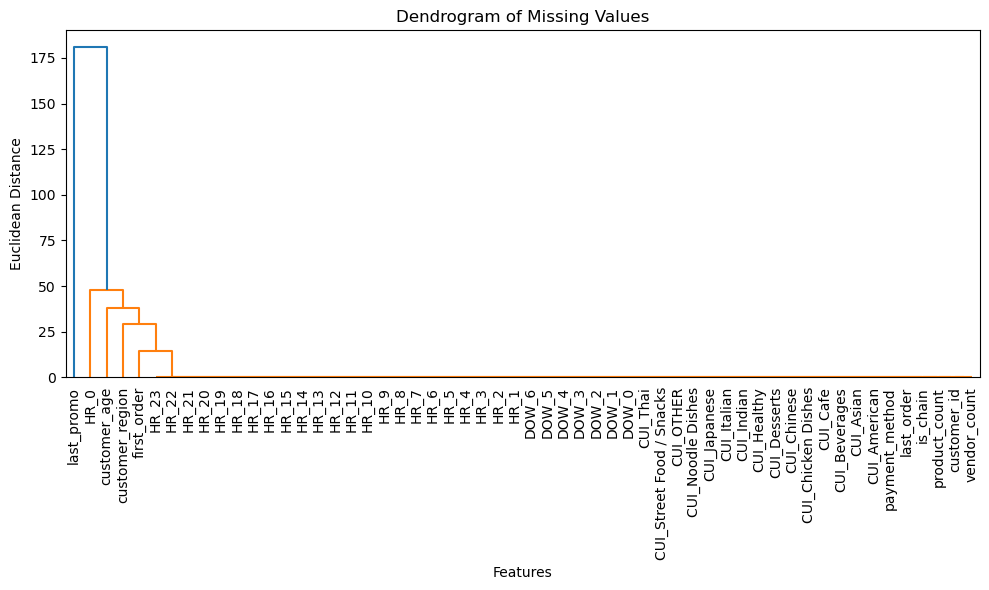

In [19]:
plot_missing_values_dendrogram(df)

The dendrogram reveals **one distinct group** of features based on their patterns of missing values:
- The blue part comprises **three closely related sub-clusters**.  
- As no significant differences exist between the sub-clusters, the **same strategy** can be applied uniformly across the entire group.


4. **Heatmap of Missing Values**

The heatmap shows correlations between missing values in different columns, revealing if missingness in one column is associated with missingness in another.

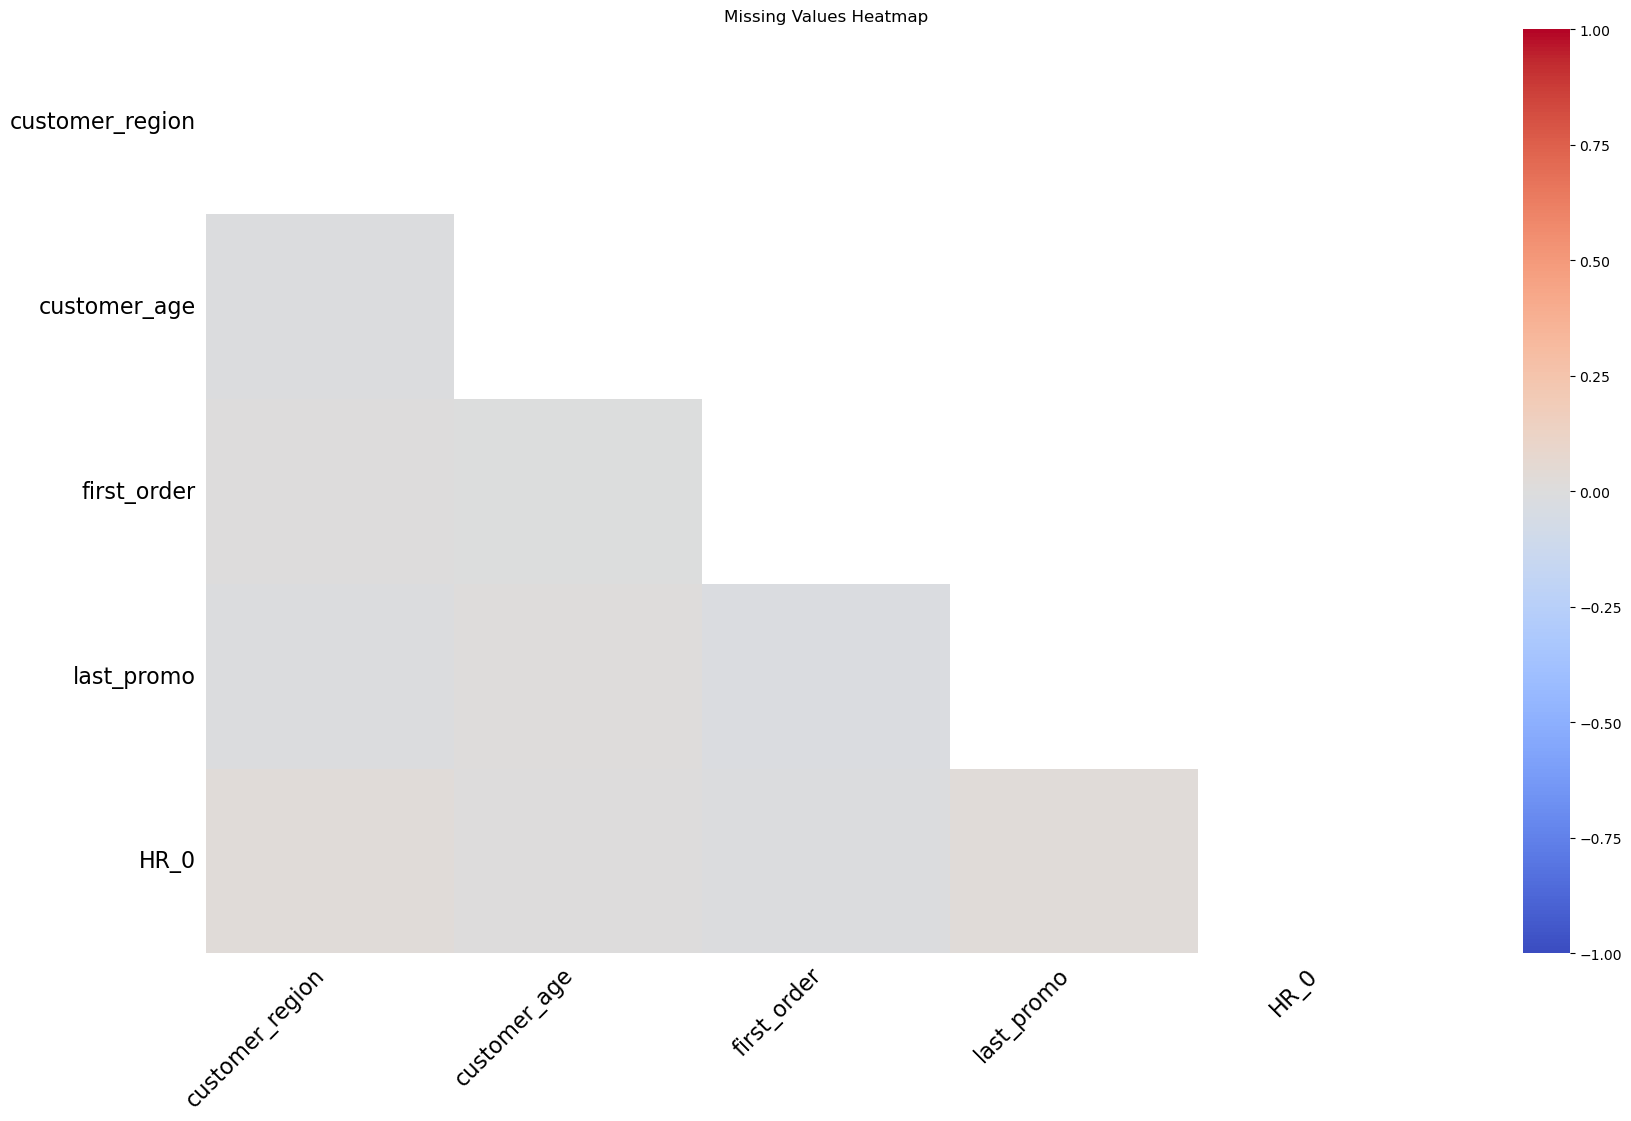

In [20]:
msno.heatmap(df, cmap="coolwarm")

plt.title("Missing Values Heatmap")
plt.show()

<a class="anchor" id="seven-bullet"> 

## <span style="color:salmon"> 7. Exploring the Features</span> 

<a href="#top">Top &#129033;</a>

<a class="anchor" id="seven-one-bullet"> 

### <span style="color:salmon"> 7.1 Numerical Variables </span> 
<span style="color:salmon"> Numerical variables represent measurable quantities and can be analyzed mathematically.</span> 

The numerical variables that exist in this dataset are:

In [21]:
numerical_features = ['customer_age', 'vendor_count', 'product_count', 'is_chain',
                      'first_order', 'last_order', 'CUI_American', 'CUI_Asian',
                      'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese',
                      'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian',
                      'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER',
                      'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2',
                      'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3',
                      'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11',
                      'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19',
                      'HR_20', 'HR_21', 'HR_22', 'HR_23'
                     ]

In [22]:
numerical_features_2 = ['customer_age', 'vendor_count', 'product_count', 'is_chain',
                      'first_order', 'last_order'
                       ]

In [23]:
numerical_features_3 = ['CUI_American', 'CUI_Asian',
                      'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese',
                      'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian',
                      'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER',
                      'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2',
                      'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3',
                      'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11',
                      'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19',
                      'HR_20', 'HR_21', 'HR_22', 'HR_23'
                       ]

In [24]:
numerical_df = df[numerical_features]

In [25]:
numerical_df_2 = df[numerical_features_2]

In [26]:
numerical_df_3 = df[numerical_features_3]

Show some statistics about the numerical_df:

In [27]:
# Describe all the columns that have numerical values
numerical_df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_age,31148.0,27.507545,7.161828,15.0,23.0,26.0,31.0,80.0
vendor_count,31875.0,3.102714,2.771753,0.0,1.0,2.0,4.0,41.0
product_count,31875.0,5.668424,6.957933,0.0,2.0,3.0,7.0,269.0
is_chain,31875.0,2.819357,3.977977,0.0,1.0,2.0,3.0,83.0
first_order,31769.0,28.469924,24.104626,0.0,7.0,22.0,45.0,90.0
last_order,31875.0,63.672376,23.227992,0.0,49.0,70.0,83.0,90.0
CUI_American,31875.0,4.877205,11.647043,0.0,0.0,0.0,5.66,280.21
CUI_Asian,31875.0,9.955306,23.561492,0.0,0.0,0.0,11.83,896.71
CUI_Beverages,31875.0,2.298224,8.475868,0.0,0.0,0.0,0.0,229.22
CUI_Cafe,31875.0,0.80149,6.428422,0.0,0.0,0.0,0.0,326.1


**After analyse that variables, we can conclude that:** <br>  
  1. customer age:
     + average customer is 27.5
     + youngest costumer=15y // oldest customer = 80y
     + 75% of customers are 31yo or younger
     + oldest customer= 80yo (outlier??)
     + most of customers are young, there are a few older individuals in the dataset <br><br>  
  2. vendor count:
     + entries with 0 (needs further exploration)
     + average vendor count is 3
     + 75% of unique vendors customers have ordered from is 4
     + max vendor count is 41 (outlier??)
     + most customers ordered from few vendors, but there are customers with much higher count <br><br>  

  3. product_count:
     + entries with 0 products (no products purchased)
     + max product count is 269 (outlier)
     + most product count is low  <br><br>  

  4. is_chain:
     + relative small amount of orders made in chain restaurants
     + max nº orders made in chain is 83
     + most count of orders made in chain restaurants is low, but there are customers with a very high number of orders in chain (outlier??) <br><br>  
  
  5. first_order:
     + on average customers place their first order 28 days after joining the app
     + st dev = 24.1 suggests a wide spread in values of first orders. (significant variability in the amount of time customers take to make their first order)
     + min = 0 (customers who did their first order today)
     + max = 90 (outlier??)
     + 75% of customers placed their first order 45 days after entering the database <br><br>  

  6. last order:
     + st dev= 23 suggests a wide spread in values of first orders. (significant variability in the amount of time customers take to make their first order)
     + min = 0 (can indicate the customer placed their first order on the first day they joined the dataset/didnt do an order yet. Compare with min first order.) <br><br>  

  7. cuisines types:
     + average may not be a good comparison measure due to the presence of extreme values. mean may be low because high spenders are a low fraction of the total dataset.
     + their spending don't increase the overall avg significance
     + 75% of customers spend nothing or a significant small amount (Asian & American cuisines) in all cuisine types, the maximum values of these cuisines
     + are significantly high (specially for American (280) and Asian (896) cuisines which indicate the presence of potential outliers who frequently order or spend heavily <br><br>  

  8. DW_0-DW_6:
     + 75% of customers ordered 1 time in that day
     + the max indicate the presence of outliers and suggests the peak
     + most customers only ordered 1 time in each day of the week. <br><br>  

  9. hours of the day
      + HR_0 : no activity at midnight
      + HR_1-23: 75% of customers placed no order in these hours. Max can be outlier or unusual behavior

For a better understanding of the numerical_features, we did some plots:

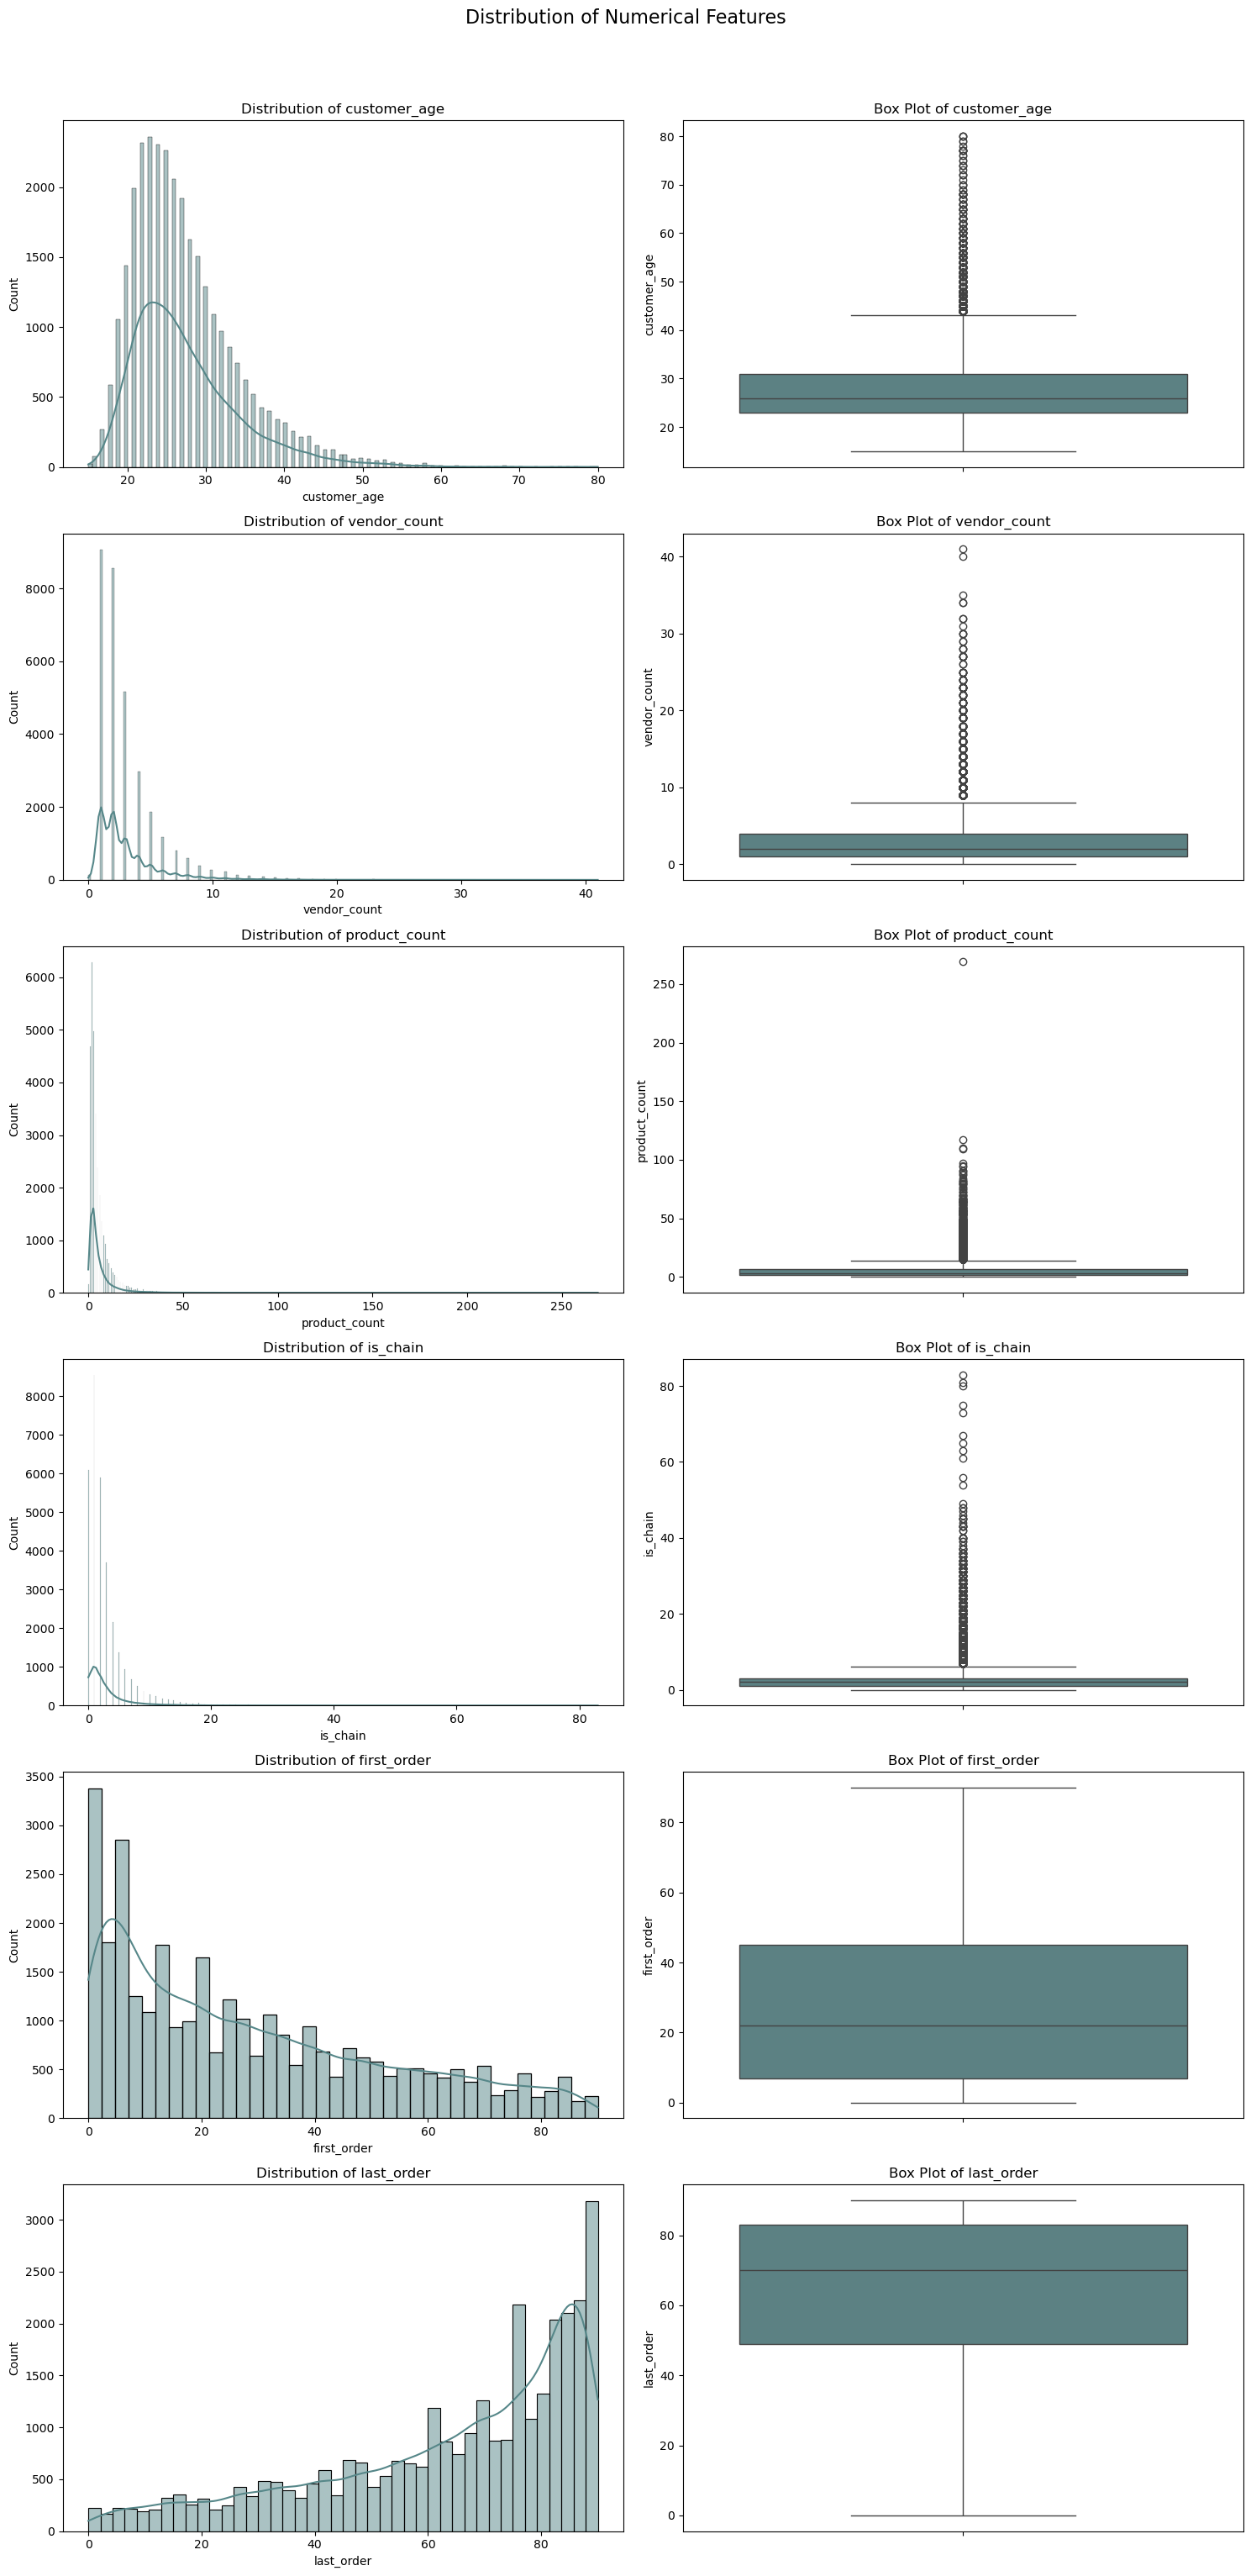

In [28]:
plot_numerical_features(numerical_df, numerical_features_2)

*Conclusions about plots above*


- **customer_age**: 
    - The ages range from 15 to 80
    - The majority of those who order being aged between 15 and 50
    - There are lots of outliers from age 45 onwards
- **vendor_count**: 
    - The distribution ranges from 0 to 41
    - The largest number of single sellers is between 0 and 10.
    - As such, from 10 onwards, you can see quite a few outliers
- **product_count**: 
    - They range from 0 to 269
    - most people order between 2 and 7 products
    - is visible outliers from 10 onwards, with a large gap after 125 and then a single value at 269
- **is_chain**: 
    - The distribution is between 0 and 83
    - Most of the values are between 1 and 3
    - From 5 onwards, there are many outliers
- **first_order**: 
    - The distribution is decreasing, i.e. the number of days from the start of the dataset when the customer first placed an order is greater than afterwards 
    - No outliers visible in this graph
- **last_order**: 
    - The distribution is increasing, i.e. the number of days from the start of the dataset when the customer most recently placed an order is greater
    - No outliers visible in this graph

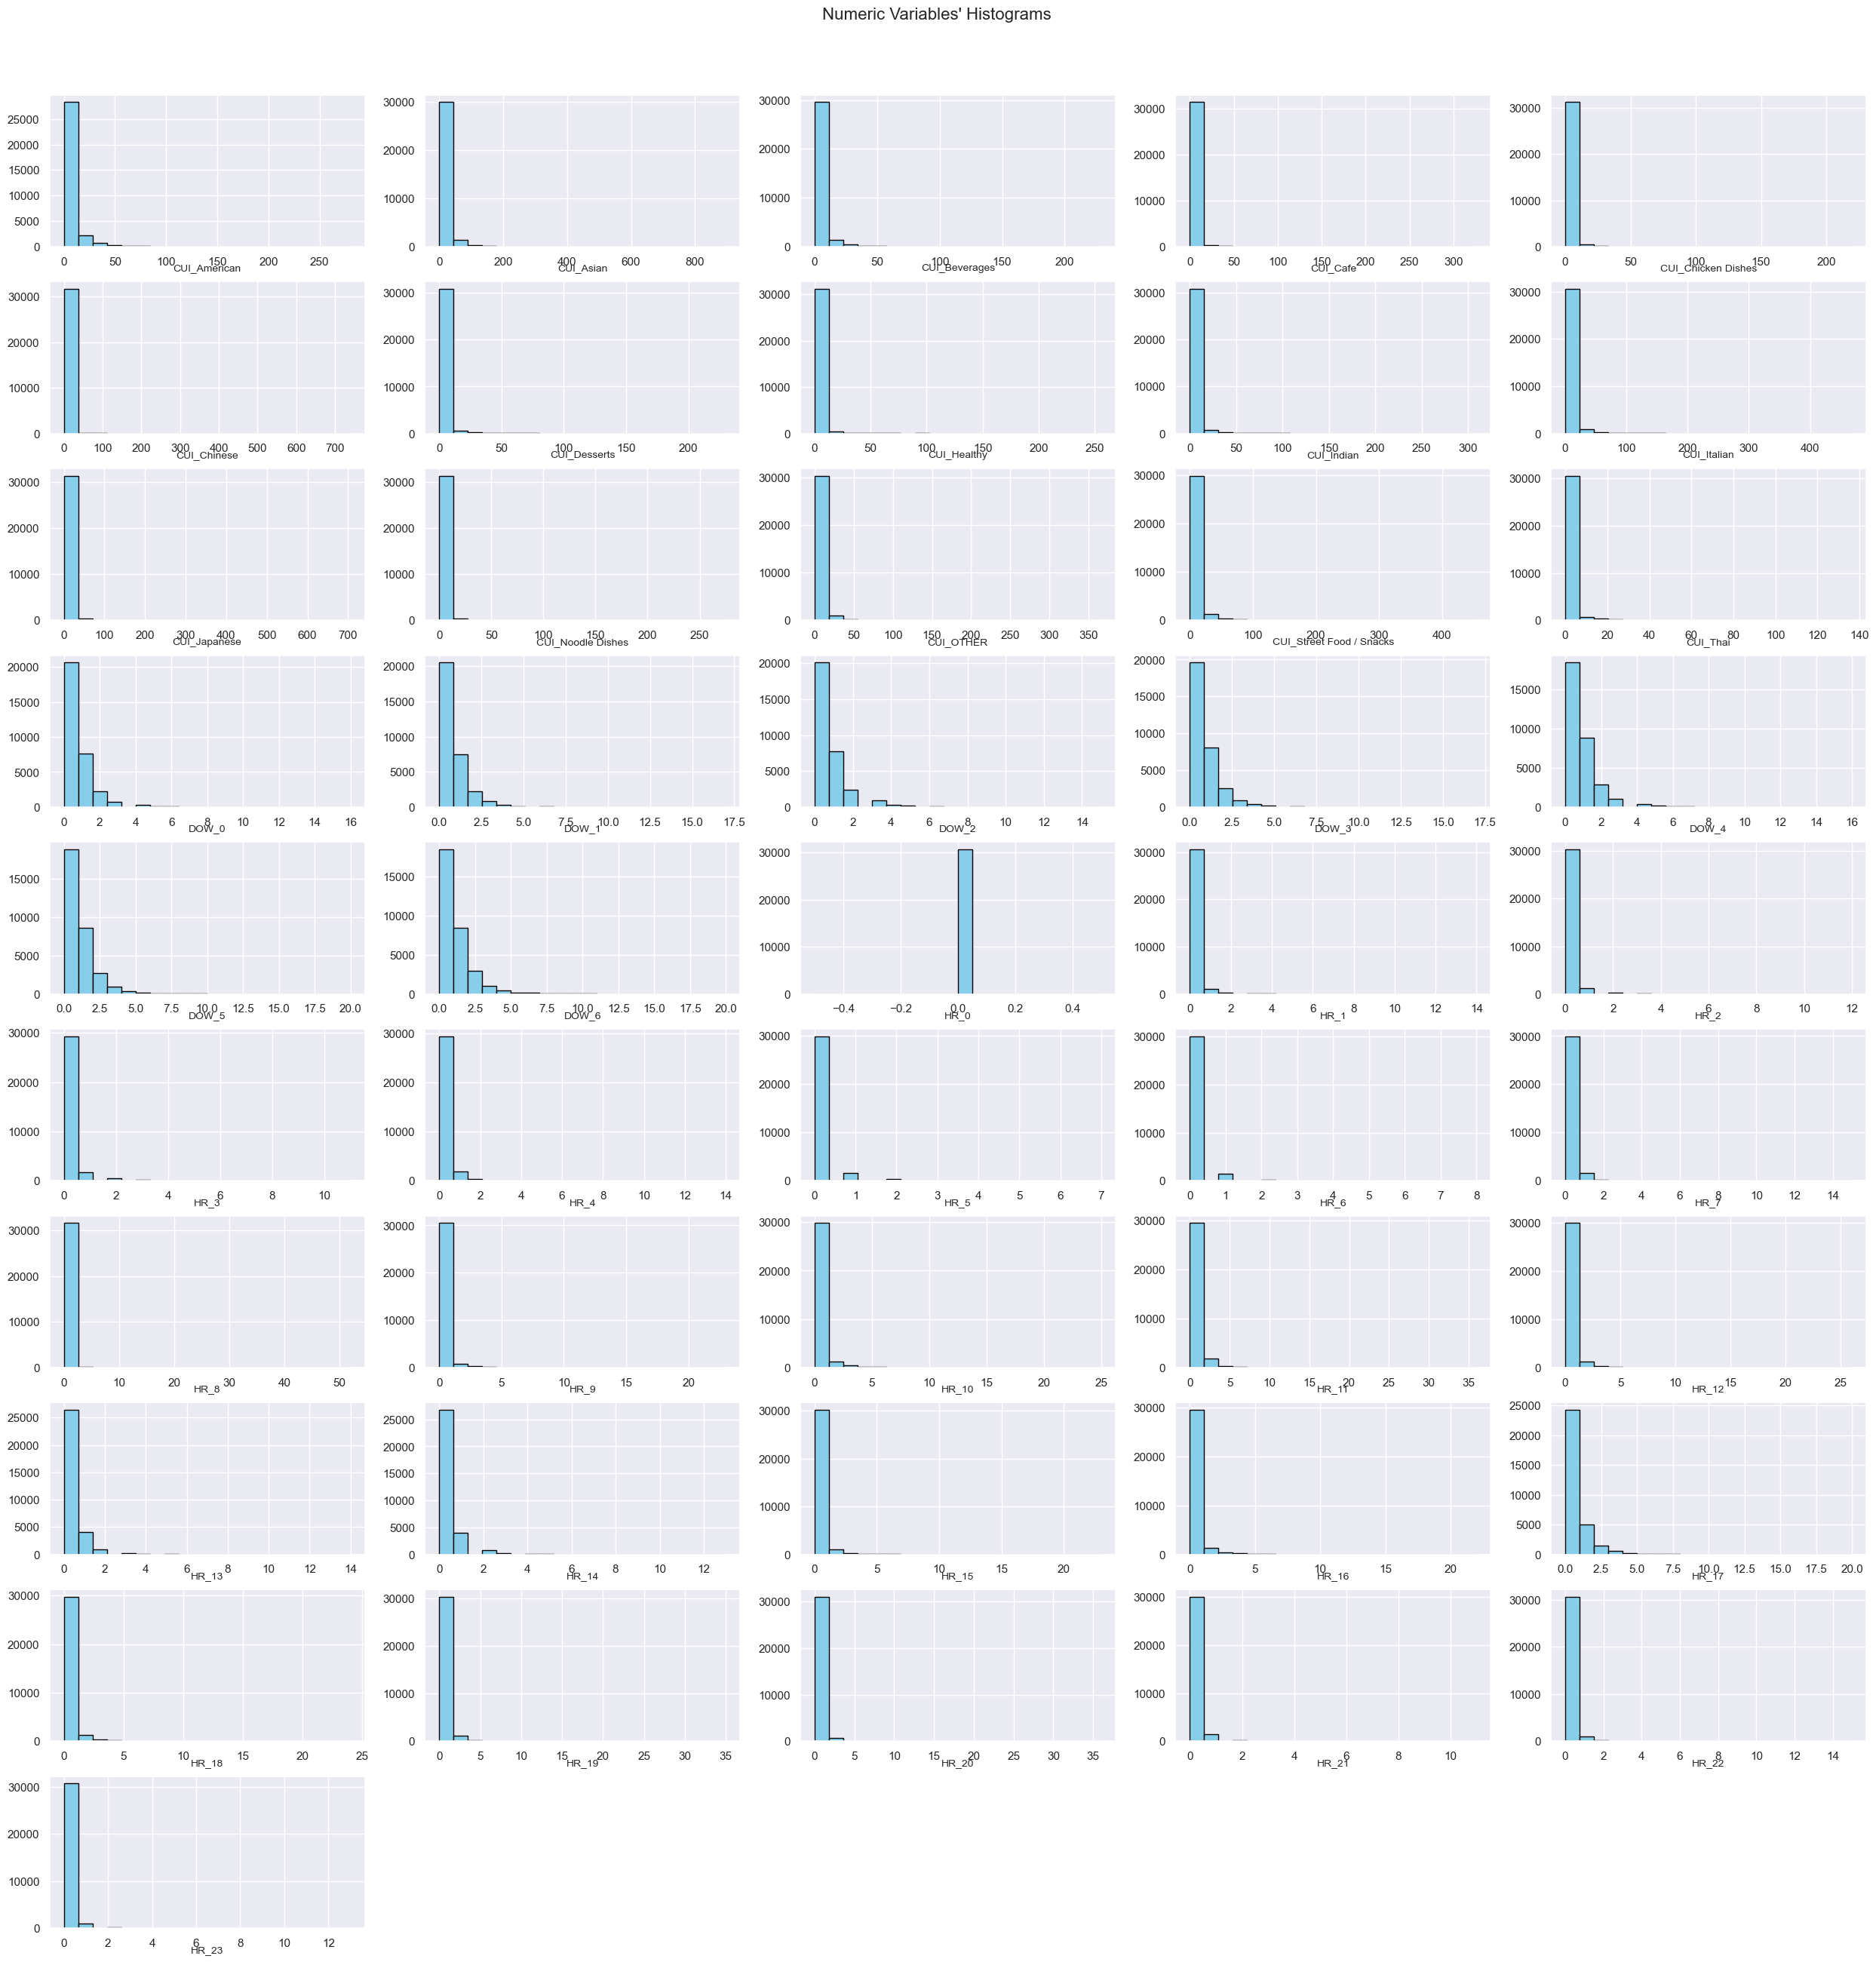

In [29]:
sns.set()

# Set up the figure and axes
rows, cols = 12, 5  
fig, axes = plt.subplots(rows, cols, figsize=(25, 30))  

# Plot each feature
for ax, feat in zip(axes.flatten(), numerical_features_3):
    ax.hist(df[feat], bins=20, color='skyblue', edgecolor='black')  
    ax.set_title(feat, fontsize=10, y=-0.2)  
    
# Hide any unused subplots if the number of features is less than rows * cols
for ax in axes.flatten()[len(numerical_features_3):]:
    ax.set_visible(False)

# Set a global title and adjust layout
plt.suptitle("Numeric Variables' Histograms", fontsize=16, y=1.02)  
plt.tight_layout()
plt.show()

These histograms provide an overview of distributions of the CUI_, DOW_ and HR_ features. They all show most values being 0 and only little values higher. Only DOW_ show a bit more frequent higher values.

We then created correlation matrix of numerical features:

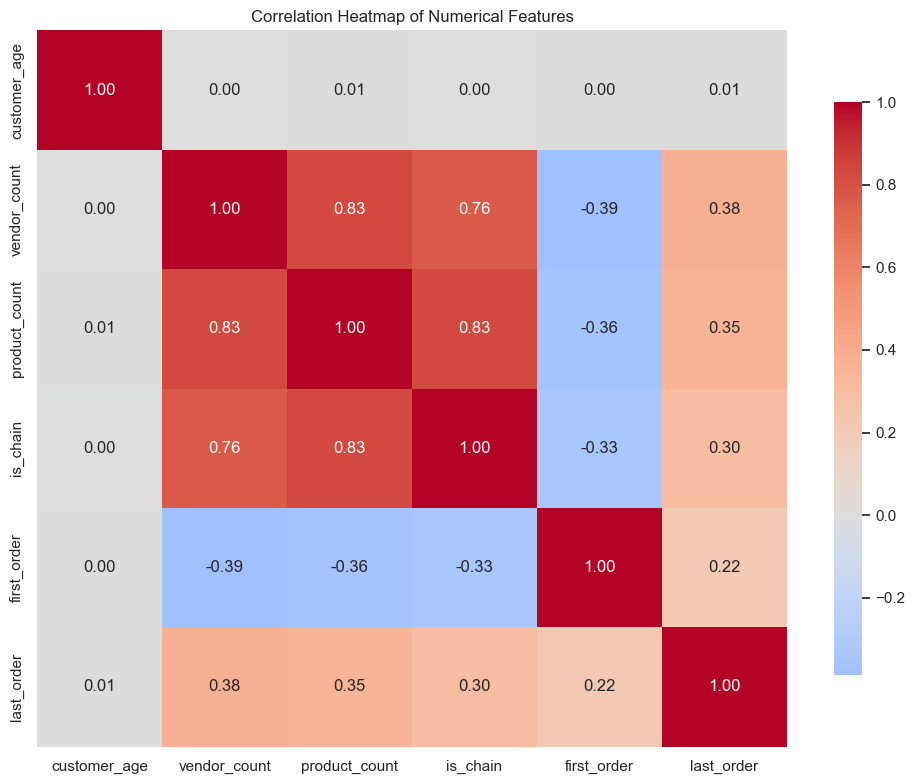

In [30]:
plot_correlation_heatmap(numerical_df_2)

About this graph, we can see:
- High positive correlation:
    - vendor_count and product_count have a correlation of 0.83, suggesting that the number of vendors is strongly related to the number of products.
    - is_chain also has a high correlation (0.83) with product_count, indicating that being part of a network is associated with more products.
- Negative correlation:
    - first_order and vendor_count have a correlation of -0.39, showing that the date of the first order is inversely related to the number of vendors.
    - first_order also has a negative correlation with product_count (-0.36).
- Little or no correlation:
    - customer_age has a correlation close to 0 with all the other variables, indicating that customer age is not related to the other characteristics.

#### <span style="color:salmon"> 1.5 Categorical variables </span>
Categorical variables represent characteristics or qualities that group data into distinct categories or labels.

In [31]:
categorical_features = [
                            'customer_region', 
                            'last_promo',
                            'payment_method'
]

In [32]:
categorical_df = df[categorical_features]

In [33]:
categorical_df.describe(include="object").T

,count,unique,top,freq
customer_region,31433,8,8670,9761
last_promo,15131,3,DELIVERY,6282
payment_method,31875,3,CARD,20153


**After analysing that variables, we can conclude:** 
  1. Customer_region:
     + Customers are from 8 different regions
     + Most customers are located in region 8670
     + Missing values <br><br>  

  2. last_promo:
     + There are promotions in 3 different categories
     + Most customers use promotions in the delivery category
     + Missing values <br><br>  

  3. payment_method:
     + There are 3 different payment methods used by customers
     + Most customers use Card as their preferred payment method <br><br>  

Then, we checked if there was stange values in this variables.

In [34]:
# Different regions where customers are located
# No strange value found
df["customer_region"][df["customer_region"].notna()].unique()

array(['2360', '8670', '4660', '2440', '4140', '2490', '8370', '8550'],
      dtype=object)

In [35]:
# Different types of discounts used by customers
# No strange value found
df["last_promo"][df["last_promo"].notna()].unique()

array(['DELIVERY', 'DISCOUNT', 'FREEBIE'], dtype=object)

In [36]:
# Different types of payment methods used by customers
# No strange value found
df["payment_method"].unique()

array(['DIGI', 'CASH', 'CARD'], dtype=object)

After analysing the categorical variables, we realise that there isn’t strange data.

In order to see better the distribution about the categorical data, we create some plots:

/Users/sofiagomes/Documents/NOVA IMS/Data Mining/Data_Mining_NOVAIMS/src/utils.py:127: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
/Users/sofiagomes/Documents/NOVA IMS/Data Mining/Data_Mining_NOVAIMS/src/utils.py:127: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
/Users/sofiagomes/Documents/NOVA IMS/Data Mining/Data_Mining_NOVAIMS/src/utils.py:127: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')


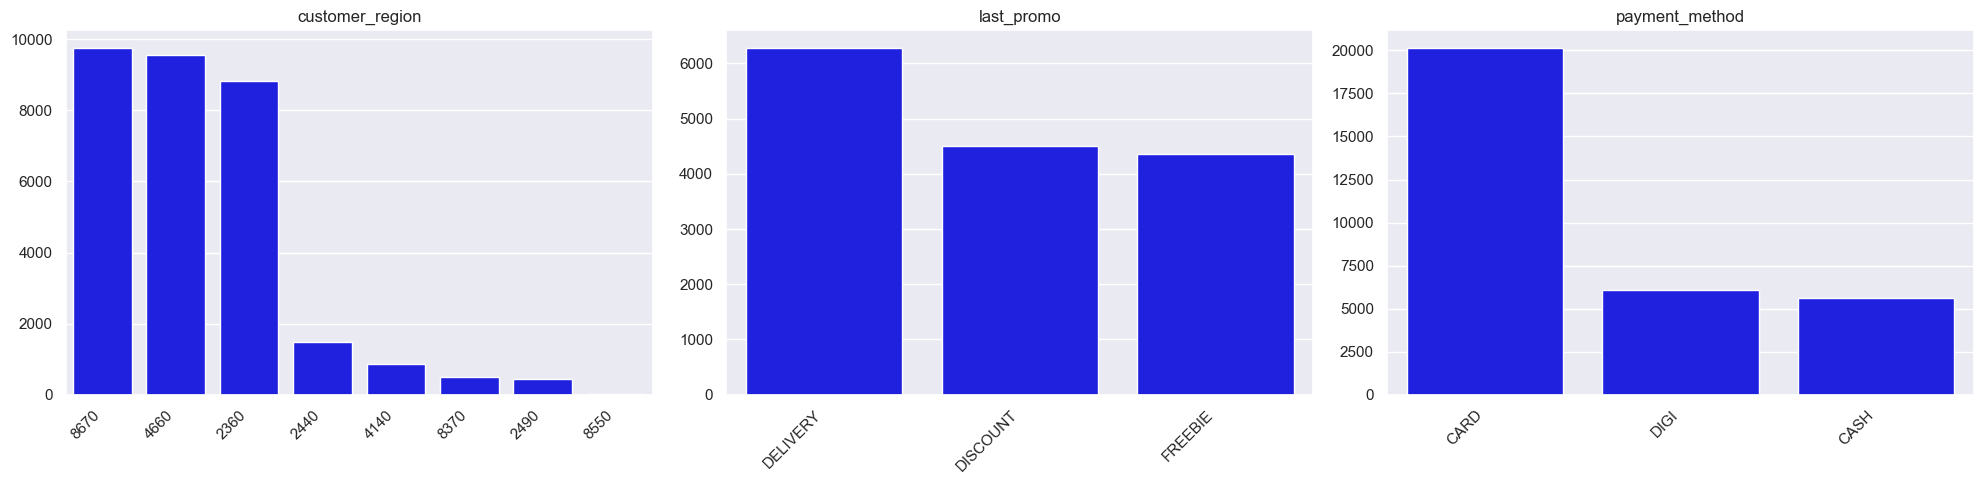

In [37]:
plot_categorical_features(categorical_df)

Set as index the variable customer_id:

In [38]:
# Set as index the variable customer_id
df = df.set_index("customer_id")

<a class="anchor" id="eight-bullet"> 

## <span style="color:salmon"> 8. Export datasets</span> 

<a href="#top">Top &#129033;</a>

In [39]:
# Store in df_explore the DataFrame of our dataset df
df_explore = pd.DataFrame(df)

# Save to CSV
df_explore.to_csv('../dataset/df_explore.csv', index=False)